In [2]:
import torch
import torchvision
from torchvision import transforms, datasets 

In [3]:
train = datasets.MNIST("", train = True, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) 

test = datasets.MNIST("", train = False, download = True, 
                       transform = transforms.Compose([transforms.ToTensor()])) 

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw


Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
trainset = torch.utils.data.DataLoader(train,batch_size =10, shuffle = True)
testset = torch.utils.data.DataLoader(test ,batch_size =10, shuffle = True)


In [5]:
total = 0 
counter_dict = {0:0, 1:0, 2:0, 3:0, 4:0, 5:0, 6:0, 7:0, 8:0, 9:0}

for data in trainset:
  xs, ys = data
  for y in ys:
     counter_dict[int(y)] += 1
     total+=1

print(counter_dict)     

{0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}


In [6]:
import torch.nn as nn
import torch.nn.functional as F

In [7]:
class Net(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784, 64)
    self.fc2 = nn.Linear(64, 64)
    self.fc3 = nn.Linear(64, 64)
    self.fc4 = nn.Linear(64, 10)

  def forward(self,x):
    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    return F.log_softmax(x, dim=1)


net = Net()
print(net)

  


Net(
  (fc1): Linear(in_features=784, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [9]:
X = torch.rand((28,28))
X = X.view(-1,28*28)

In [10]:
output = net(X)

In [11]:
output

tensor([[-2.1960, -2.1660, -2.3508, -2.3657, -2.4335, -2.3525, -2.3538, -2.4337,
         -2.2054, -2.2150]], grad_fn=<LogSoftmaxBackward>)

In [26]:
import torch.optim as optim

optimizer = optim.Adam(net.parameters(), lr = 0.001 )

EPOCHS = 3

for epoch in range(EPOCHS):
  for data in trainset:
    X,y = data
    net.zero_grad()
    output = net(X.view(-1, 28*28))
    loss = F.nll_loss(output,y)
    loss.backward()
    optimizer.step()
  print(loss) 


tensor(3.1361e-05, grad_fn=<NllLossBackward>)
tensor(2.3961e-06, grad_fn=<NllLossBackward>)
tensor(0.0008, grad_fn=<NllLossBackward>)


In [28]:
correct = 0
total = 0

with torch.no_grad() :
  for data in trainset:
    X,y = data
    output  = net(X.view(-1,784))
    for idx, i in enumerate(output):
      if torch.argmax(i) == y[idx] :
        correct += 1
      total += 1
print("accuracy: ", round(correct/total,3))        



accuracy:  0.991


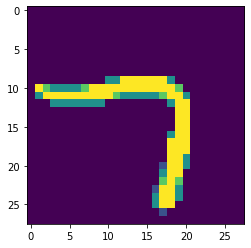

In [34]:
import matplotlib.pyplot as plt
plt.imshow(X[1].view(28,28))
plt.show()

In [35]:
print(torch.argmax(net (X[1].view(-1,784))[0]))

tensor(7)
